# Análise de dados do datasus  
https://datasus.saude.gov.br/informacoes-de-saude-tabnet/  

---

Procedimentos hospitalares do SUS - por local de internação - Brasil  
Valor total por Unidade da Federação e Ano/mês atendimento  
Período: Jan/2008 a Ago/2020  

# Leitura e processamento inicial dos dados

Dataset do SUS

In [1]:
# imports...
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np
import pandas as pd
import random
import warnings

# personalizando opções gerais dos módulos
pd.options.display.float_format = lambda item: f'{item:.2f}'
sns.set_style("whitegrid")
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# url do dataset do sus
url_sus = 'https://raw.githubusercontent.com/LucasGabrielB/Alura-Bootcamp-Data-Science-Aplicada/main/Modulo-01/datasets/Valor%20total%20por%20Ano-m%C3%AAs%20atendimento%20segundo%20Unidade%20da%20Federa%C3%A7%C3%A3o.csv'

# criando o dataframe apartir da url do arquivo
df_sus = pd.read_csv(url_sus,
                 encoding='ISO-8859-1',
                 sep=';',
                 skiprows=3,
                 skipfooter=12,
                 thousands='.',
                 decimal=',',
                 engine='python',
                 na_values='-',
                 index_col='Unidade da Federação')

# criando uma coluna apenas para guardar o codigo UF do estado
df_sus['Codigo UF'] = [''.join(i[0]) for i in df_sus.index.str.split(' ')]
# removendo o codigo da uf do index
df_sus.index = [' '.join(i[1:]).strip() for i in df_sus.index.str.split(' ')]

# renomeando o index
df_sus.index.name = 'Unidades da Federação'

In [3]:
df_sus.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,Codigo UF
Unidades da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72,11
Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63,12
Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23,13
Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18,14
Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71,15


In [4]:
# adiciona a coluna Região ao dataset

def codigo_uf_para_regiao(codigo):
    ''' retorna o nome da regiao de um estado de acordo com seu codigo UF'''
    
    if 11 <= codigo <= 17:
        return 'Norte'
    elif 21 <= codigo <= 29:
        return 'Nordeste'
    elif 31 <= codigo <= 35:
        return 'Sudeste'
    elif 41 <= codigo <= 43:
        return 'Sul'
    elif 50 <= codigo <= 53:
        return 'Centro-Oeste'
    else:
        return 'Desconhecido'


# criando uma coluna para guardar a região do estado
df_sus['Região'] = [codigo_uf_para_regiao(int(i)) for i in df_sus['Codigo UF']]

df_sus.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,Codigo UF,Região
Unidades da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72,11,Norte
Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63,12,Norte
Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23,13,Norte
Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18,14,Norte
Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71,15,Norte


Dataset do TCU (Tribunal de Contas da União)

In [5]:
url_tcu = 'https://raw.githubusercontent.com/LucasGabrielB/Alura-Bootcamp-Data-Science-Aplicada/main/Modulo-01/datasets/serie_2001_2020_TCU.xls'

df_tcu = pd.read_excel(url_tcu,
                        skiprows=4,
                        skipfooter=10)
                        
df_tcu = df_tcu[['Unidades da Federação', 2020]].drop(0)
df_tcu = df_tcu.set_index('Unidades da Federação')
df_tcu = df_tcu.drop(['Brasil',
                        'Região Norte',
                        'Região Nordeste',
                        'Região Sudeste',
                        'Região Sul',
                        'Região Centro-Oeste'])

In [6]:
df_tcu.head()

,2020
Unidades da Federação,
Rondônia,1796460.00
Acre,894470.00
Amazonas,4207714.00
Roraima,631181.00
Pará,8690745.00


# Análise dos dados 


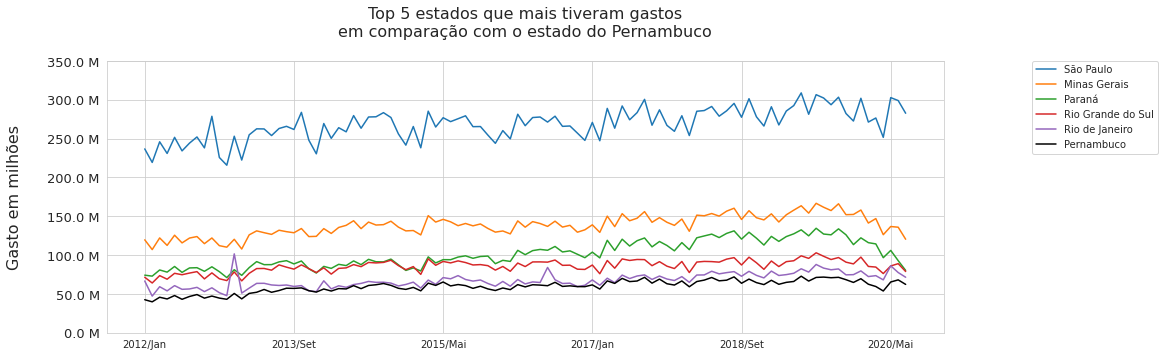

In [7]:
# plotando os 5 estados que mais tiveram gastos no total, e um estado de escolha

# criando dataframe temporario
df_temp = df_sus.drop(['Região', 'Codigo UF'], axis=1).dropna(axis=1)

# ordenando valores
df_temp.sort_values('Total', ascending=False, inplace=True)
df_temp.drop('Total', axis=1, inplace=True)

# selecionando apenas dados apartir de jan/2012
df_temp = df_temp[df_temp.columns[53:]]

# alterando escala para 1/1,000,000
df_temp = df_temp / 1_000_000

fig, ax = plt.subplots()

# grafico com os 5 estados que mais tiveram gastos no total
g1 = df_temp.head(5).T.plot(figsize=(15, 5), ax=ax)
g1.yaxis.set_major_formatter(StrMethodFormatter('{x} M'))

# grafico com um o estado do Pernambuco
g2 = df_temp.loc['Pernambuco'].T.plot(figsize=(15, 5), ax=ax, color='black')
g2.yaxis.set_major_formatter(StrMethodFormatter('{x} M'))

# personalizando grafico
plt.ylabel('Gasto em milhões', labelpad=25, fontsize=16)
ax.tick_params(axis='y', labelsize=13)
plt.title('Top 5 estados que mais tiveram gastos\nem comparação com o estado do Pernambuco', pad=25, fontsize=16)
plt.ylim(0, 350)

# colocando a legenda do grafico ao lado dele 
plt.legend(loc='center left', bbox_to_anchor=(1.1, .83))

plt.show()

Os horrores da pizza...

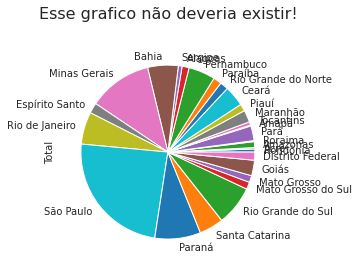

In [8]:
# plotando o grafico que não deveria existir kkk
g3 = df_sus['Total'].plot(kind='pie')

plt.title('Esse grafico não deveria existir!', pad=25, fontsize=16)
ax.tick_params(axis='y', labelsize=13)

plt.show()

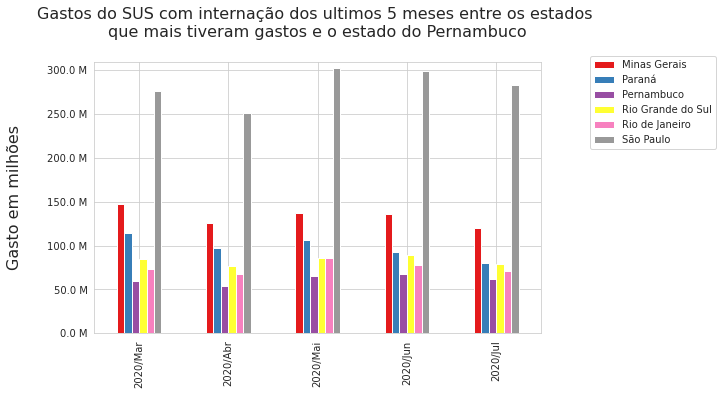

In [9]:
# pega as colunas dos ultimos 5 messes
last_five_months = df_temp.columns[-5:]

# criando um dataframe para guardar os dados dos estados que seram usados para
# criar o grafico 
df_comparation = df_temp[last_five_months].head(5)
df_comparation = df_comparation.append(df_temp[last_five_months].loc['Pernambuco'])
df_comparation = df_comparation.sort_index()

# grafico com os 5 estados que mais tiveram gastos no total e o estado do Pernambuco
g4 = df_comparation.T.plot(figsize=(8, 5), kind='bar', colormap='Set1')
g4.yaxis.set_major_formatter(StrMethodFormatter('{x} M'))

# personalizando grafico
plt.ylabel('Gasto em milhões', labelpad=25, fontsize=16)
ax.tick_params(axis='y', labelsize=13)
plt.title('Gastos do SUS com internação dos ultimos 5 meses entre os estados \nque mais tiveram gastos e o estado do Pernambuco', pad=25, fontsize=16)
plt.ylim(0, 310)

# colocando a legenda do grafico ao lado dele 
plt.legend(loc='center left', bbox_to_anchor=(1.1, .85))

plt.show()

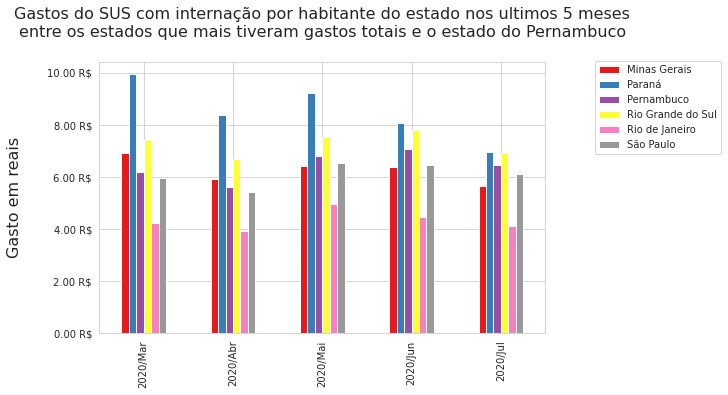

In [10]:
# criando dataframe temporario
df_temp = df_sus.drop(['Região', 'Codigo UF'], axis=1).dropna(axis=1)

# ordenando valores
df_temp.sort_values('Total', ascending=False, inplace=True)
df_temp.drop('Total', axis=1, inplace=True)

# selecionando apenas dados apartir de jan/2012
df_temp = df_temp[df_temp.columns[53:]]

# media de gastos por habitante
df_average_spending = df_temp[last_five_months].head(5)
df_average_spending = df_average_spending.append(df_temp[last_five_months].loc['Pernambuco'])
df_average_spending = df_average_spending.div(df_tcu[2020], axis=0).dropna()
df_average_spending = df_average_spending.sort_index()

g6 = df_average_spending.T.plot(kind='bar', colormap='Set1', figsize=(8, 5))

# personalizando grafico
plt.ylabel('Gasto em reais', labelpad=25, fontsize=16)
ax.tick_params(axis='y', labelsize=13)
plt.title('', pad=25, fontsize=16)
plt.title('Gastos do SUS com internação por habitante do estado nos ultimos 5 meses\nentre os estados que mais tiveram gastos totais e o estado do Pernambuco', pad=25, fontsize=16)
g6.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f} R$'))

# colocando a legenda do grafico ao lado dele 
plt.legend(loc='center left', bbox_to_anchor=(1.1, .83))

plt.show()